In [ ]:
# 1500 dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = pd.read_excel('try2.xlsx')

In [ ]:
data.dropna(subset=['text'], inplace=True)
data.dropna(subset=['Score'], inplace=True)

In [ ]:
data['text'].isnull().sum()
data['Score'].isnull().sum()

0

In [ ]:
data.iloc[350]["Score"]

4

In [ ]:
import numpy as np

data['sentimen'] = data['Score'].apply(lambda x: 'negative' if int(x) <= 2 else ('positive' if int(x) >= 4 else np.nan))


In [ ]:
# Drop rows with 'sentimen' set to null
data.dropna(subset=['sentimen'], inplace=True)

In [ ]:
data.drop('Score', axis=1, inplace=True)

In [ ]:
import re

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Pra-pemrosesan data
def preprocess_text(text):
    # Menghilangkan simbol dan emotikon
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U0001F600-\U0001F6FF]', '', text)

    # Mengubah huruf menjadi lowercase
    text = text.lower()

    # Menghilangkan stopwords
    stop_words = set(stopwords.words('indonesian'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)

    return text

# Melakukan pra-pemrosesan pada data ulasan
data['text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# UP

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Memisahkan fitur dan label
X = data['text']
y = data['sentimen']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan ekstraksi fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Melatih model KNN
k = 5  # Jumlah tetangga terdekat yang akan digunakan
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.7565217391304347


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print("Akurasi: {:.2f}%".format(accuracy_percent))


Akurasi: 75.65%


In [ ]:
new_data = ["calon IKM ,ibukota mangkrak"]
new_data_tfidf = vectorizer.transform(new_data)
predicted_score = knn.predict(new_data_tfidf)
print("Prediksi skor:", predicted_score)

Prediksi skor: ['negative']


In [ ]:
# Contoh prediksi untuk data baru
new_data = ["Pokoknya ekosistem hijau saya dukungg"]
new_data_tfidf = vectorizer.transform(new_data)
predicted_score = knn_model.predict(new_data_tfidf)
print("Prediksi skor:", predicted_score)

Prediksi skor: ['positive']


In [ ]:
# Evaluasi model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

In [ ]:
print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 64  54]
 [  2 110]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.54      0.70       118
    positive       0.67      0.98      0.80       112

    accuracy                           0.76       230
   macro avg       0.82      0.76      0.75       230
weighted avg       0.82      0.76      0.75       230



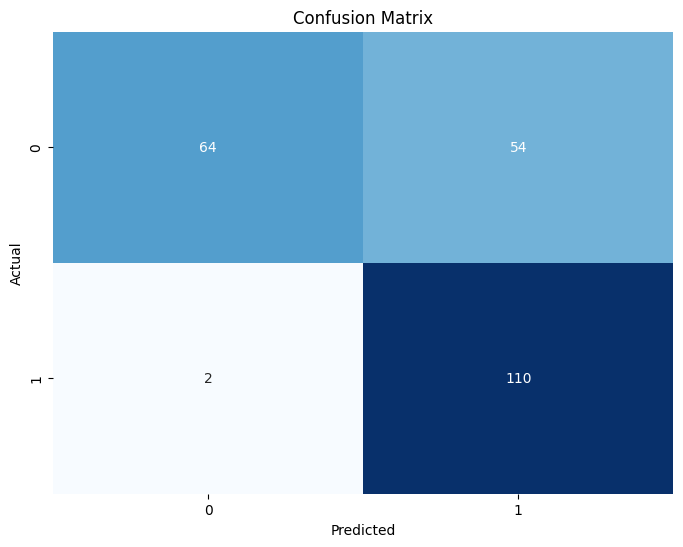

In [ ]:
# Visualisasi confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

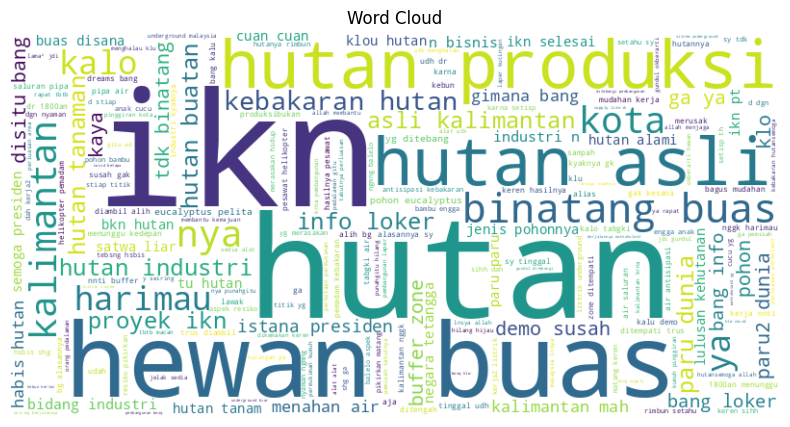

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have the preprocessed text data in a variable 'preprocessed_text'
text_data = data['text'].tolist()

# Combine the preprocessed text into a single string
text = ' '.join(text_data)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()